<a href="https://colab.research.google.com/github/Jundula/Neural-networks/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing or Installing packages**

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
pip install yfinance

In [17]:
import yfinance as yf

In [52]:
aapl = yf.download('AAPL', start = '2004-1-1')

[*********************100%***********************]  1 of 1 completed


In [56]:
aapl.Close[:]

Ticker,AAPL
Date,
2004-01-02 00:00:00+00:00,0.380000
2004-01-05 00:00:00+00:00,0.395893
2004-01-06 00:00:00+00:00,0.394464
2004-01-07 00:00:00+00:00,0.403393
2004-01-08 00:00:00+00:00,0.417143
...,...
2024-11-19 00:00:00+00:00,228.279999
2024-11-20 00:00:00+00:00,229.000000
2024-11-21 00:00:00+00:00,228.520004


In [65]:
aapl.Close[0:1]

Ticker,AAPL
Date,
2004-01-02 00:00:00+00:00,0.38


<Axes: xlabel='Date'>

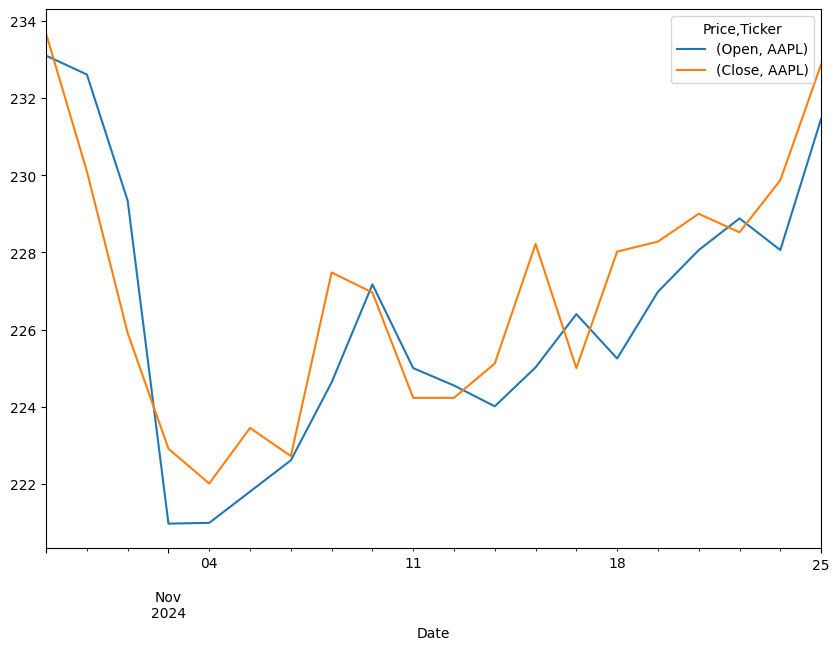

In [8]:
aapl[['Open','Close']].iloc[-20:].plot(figsize=[10,7])


<Axes: xlabel='Date'>

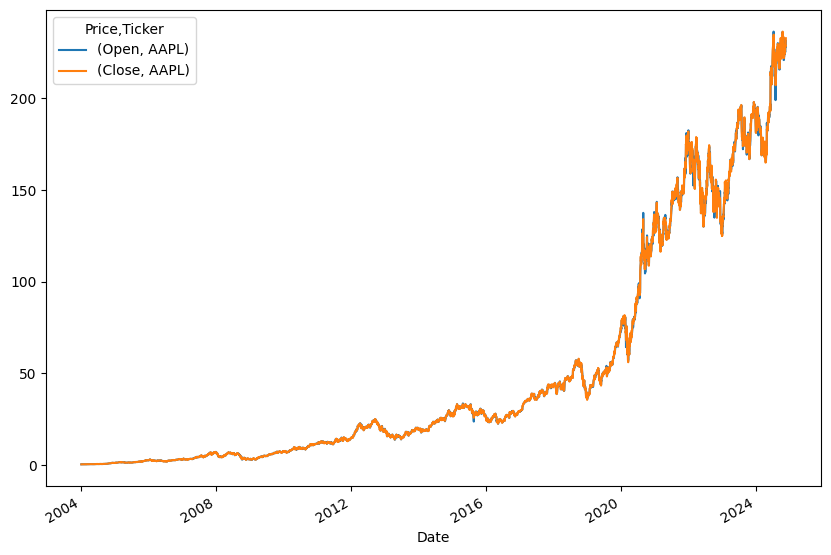

In [9]:
aapl[['Open','Close']].plot(figsize=[10,7])

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
#aapl = yf.download('AAPL', start = '2004-1-1')


inpos = 0
th = 120
pnls = []
dates = []

for i, price in enumerate(aapl.Close.AAPL):
    if inpos == 0 and aapl.Close.AAPL.iloc[i-1]<th and aapl.Close.AAPL.iloc[i]>=th:
        inpos = 1
        entry = price
        print('entry',entry)

    elif inpos == 1 and price > th+5:
        inpos = 0
        pnl = (price - entry)/entry
        print('exit', price, pnl, pnl*100)
        pnls.append(pnl)
        dates.append(aapl.index[i])



entry 124.37000274658203
exit 125.85749816894531 0.011960242739515103 1.1960242739515103
entry 124.4000015258789
exit 127.87999725341797 0.027974241839660425 2.7974241839660423
entry 121.08999633789062
exit 125.56999969482422 0.03699730359585239 3.699730359585239
entry 123.38999938964844
exit 125.9000015258789 0.02034202243817371 2.0342022438173712


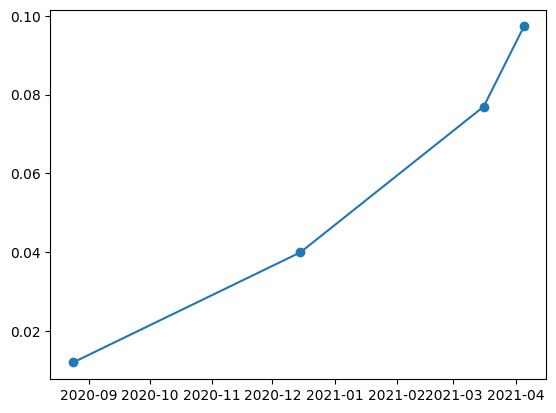

In [97]:
plt.plot(dates,np.cumsum(pnls), '-o')

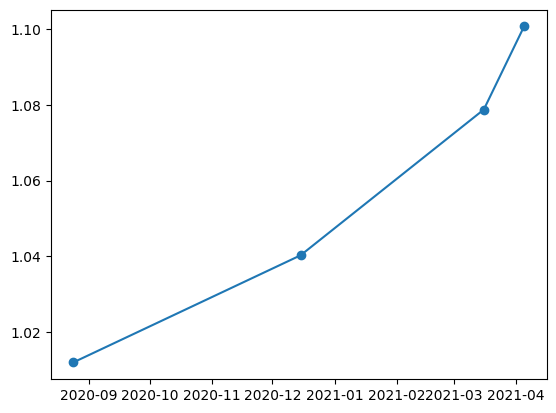

In [98]:
plt.plot(dates,np.cumprod(1+np.array(pnls)), '-o') #

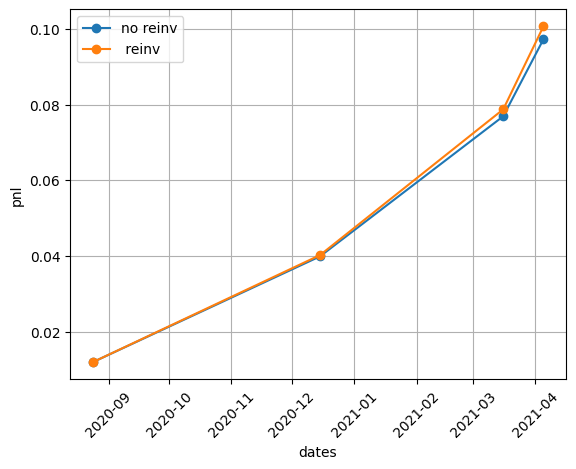

In [105]:
plt.plot(dates,np.cumsum(pnls), '-o', label ='no reinv')
plt.plot(dates,np.cumprod(1+np.array(pnls))-1, '-o', label =' reinv') #

plt.xticks(rotation=45)
plt.grid()
plt.xlabel('dates')
plt.ylabel('pnl')
plt.legend()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
spy = yf.download('SPY', start = '2010-1-1')




[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

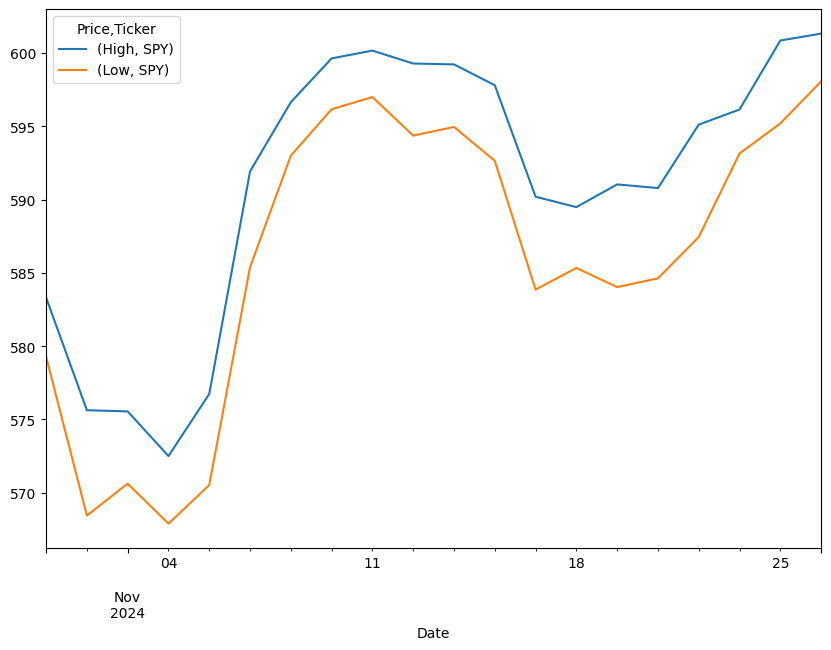

In [2]:
spy[['High','Low']].iloc[-20:].plot(figsize=[10,7])

Hello world of trading algo

In [4]:
inpos = 0
th = 600
pnls = []
dates = []

for i, price in enumerate(spy.Close.SPY):
    if inpos == 0 and spy.Close.SPY.iloc[i-1]<th and spy.Close.SPY.iloc[i]>=th:
        inpos = -1
        entry = price
        print('entry',entry)

    #elif inpos == 1 and price > th+5:
    elif inpos == 1 and price < th+5:
        inpos = 0
        pnl = (price - entry)/entry
        print('exit', price, pnl, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

entry 121.19000244140625
exit 125.38999938964844 0.03465629889951385 3.465629889951385
entry 120.62000274658203
exit 125.48999786376953 0.04037468915847375 4.037468915847375
entry 120.05000305175781
exit 126.22000122070312 0.051395235419404425 5.139523541940442


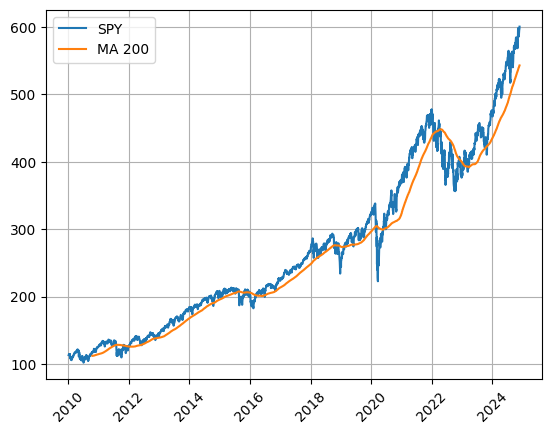

In [25]:
plt.plot(spy.Close, label = 'SPY')
plt.plot(spy.Close.rolling(200).mean(),label = 'MA 200')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

In [66]:
inpos = 0
pnls = []
dates = []

for i, price in enumerate(spy.Close.SPY):
    ma = spy.Close.SPY.iloc[i-200:i].mean()
    if inpos == 0 and ma > price:
        inpos = 1
        entry = price
        print('entry',entry)

    elif inpos == 1 and ma < price:

        pnl = (price - entry)/entry
        inpos = 0
        print('exit', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])


entry 125.48999786376953
exit 128.6300048828125 2.502197045577866
entry 125.5
exit 127.87999725341797 1.8964121541179033
entry 123.16000366210938
exit 126.7300033569336 2.8986680648520817
entry 123.94999694824219
exit 126.38999938964844 1.9685377180163401
entry 124.83000183105469
exit 126.12000274658203 1.0334061496476104
entry 125.5
exit 127.5 1.593625498007968
entry 128.16000366210938
exit 129.07000732421875 0.7100527747397517
entry 138.0399932861328
exit 139.1300048828125 0.7896346346672762
entry 190.5399932861328
exit 194.07000732421875 1.8526368019678343
entry 204.52999877929688
exit 207.47999572753906 1.4423297148822918
entry 203.97000122070312
exit 207.50999450683594 1.7355460435098045
entry 204.83999633789062
exit 208.72999572753906 1.8990428916195397
entry 205.61000061035156
exit 209.6199951171875 1.9502915689569098
entry 205.33999633789062
exit 208.02999877929688 1.3100236141914618
entry 204.86000061035156
exit 207.39999389648438 1.2398678505151126
entry 205.92999267578125
ex

AttributeError: 'list' object has no attribute 'plot'

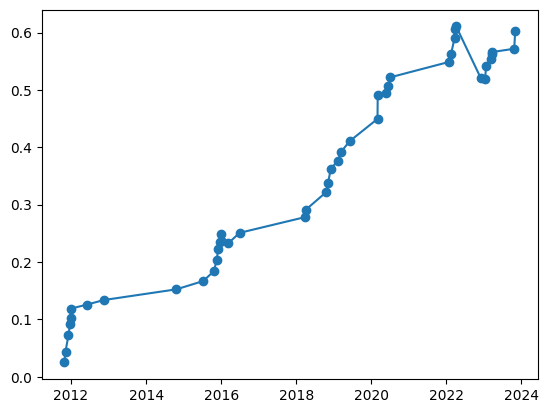

In [67]:
plt.plot(dates,np.cumsum(pnls), '-o')

In [ ]:
inpos = 0
pnls = []
dates = []

for i, price in enumerate(spy.Close.SPY):
    ma = spy.Close.SPY.iloc[i-200:i].mean()
    if inpos == 0 and ma < price:
        inpos = 1
        entry = price
        print('entry',entry)

    elif inpos == 1 and ma > price:

        pnl = (price - entry)/entry
        inpos = 0
        print('exit', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

plt.plot(dates,np.cumsum(pnls), '-o')

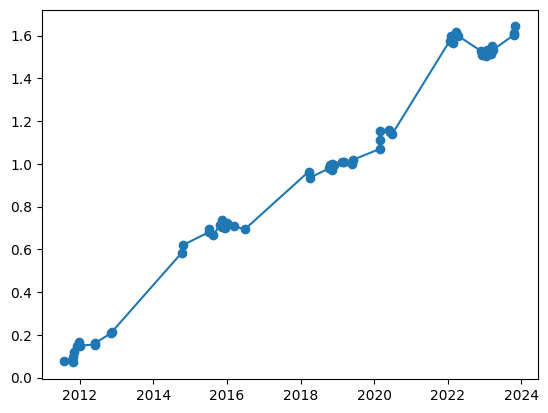

In [74]:
inpos = 0
pnls = []
dates = []

for i, price in enumerate(spy.Close.SPY):
    ma = spy.Close.SPY.iloc[i-200:i].mean()
    if inpos == 0 and ma < price:
        inpos = 1
        entry = price
        #print('entry long',entry)

    elif inpos == 1 and ma > price:

        pnl = (price - entry)/entry
        inpos = 0
        #print('exit long', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

    if inpos == 0 and ma > price:
        inpos = -1
        entry = price
        #print('entry short',entry)

    elif inpos == -1 and ma < price:

        pnl = (price - entry)/entry
        inpos = 0
        #print('exit short', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

plt.plot(dates,np.cumsum(pnls), '-o')

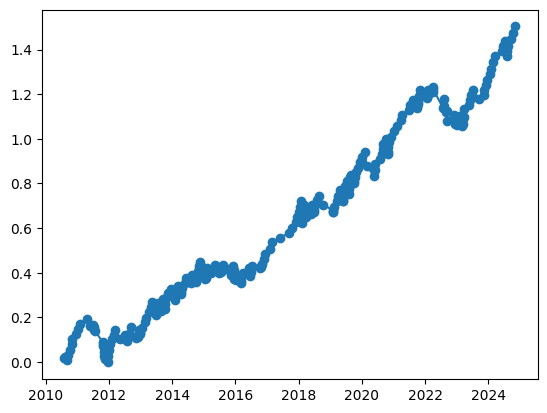

In [91]:
inpos = 0
pnls = []
dates = []

for i, price in enumerate(spy.Close.SPY):
    ma = spy.Close.SPY.iloc[i-100:i].mean()
    if inpos == 0 and ma < price:
        inpos = 1
        entry = price
        #print('entry long',entry)

    elif inpos == 1 and ((price - entry)/entry >0.02 or ma > price):

        pnl = (price - entry)/entry
        inpos = 0
        #print('exit long', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

    if inpos == 0 and ma > price:
        inpos = -1
        entry = price
        #print('entry short',entry)

    elif inpos == -1 and ((price - entry)/entry >0.02 or ma < price):

        pnl = (price - entry)/entry
        inpos = 0
        #print('exit short', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

plt.plot(dates,np.cumsum(pnls), '-o')

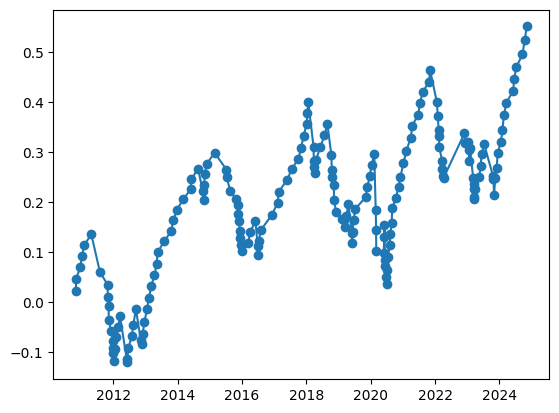

In [110]:
inpos = 0
pnls = []
dates = []

for i, price in enumerate(spy.Close.SPY):
    ma = spy.Close.SPY.iloc[i-200:i].mean()
    ma_m1 = spy.Close.SPY.iloc[i-201:i-1].mean()
    if inpos == 0 and ma < price:
        inpos = 1
        entry = price
        #print('entry long',entry)

    elif inpos == 1 and ((price - entry)/entry >0.02 or ma > price):

        pnl = (price - entry)/entry * inpos
        inpos = 0
        #print('exit long', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

    if inpos == 0 and ma_m1 < spy.Close.SPY.iloc[i-1] and ma > price:
        inpos = -1
        entry = price
        #print('entry short',entry)

    elif inpos == -1 and ((price - entry)/entry >0.02 or ma < price):

        pnl = (price - entry)/entry * inpos
        inpos = 0
        #print('exit short', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

plt.plot(dates,np.cumsum(pnls), '-o')

Skewed returns, to the right means the long side trades differently from the short side, it's a productive asset

array([[<Axes: title={'center': 'SPY'}>]], dtype=object)

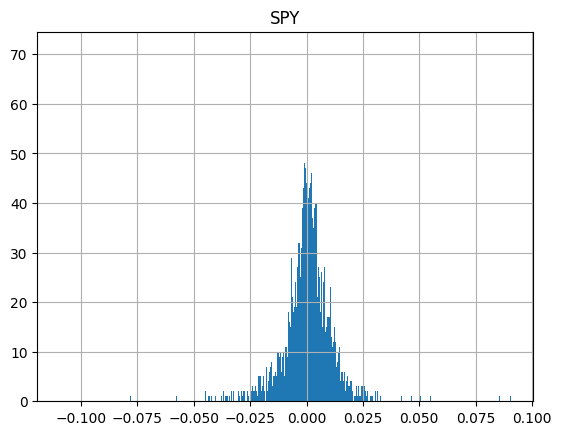

In [85]:
spy.Close.pct_change().hist(bins=1000)

slightly positive : means on average you earn per day 5.03 basis points  *252 trading days it gives 12% yearly

In [89]:
spy.Close.SPY.pct_change().mean() *252

0.12682354398213913

In [90]:
spy.Close.SPY.pct_change().mean()

0.0005032680316751553

unrealized returns are more important, better to work with, it includes the DD or DU

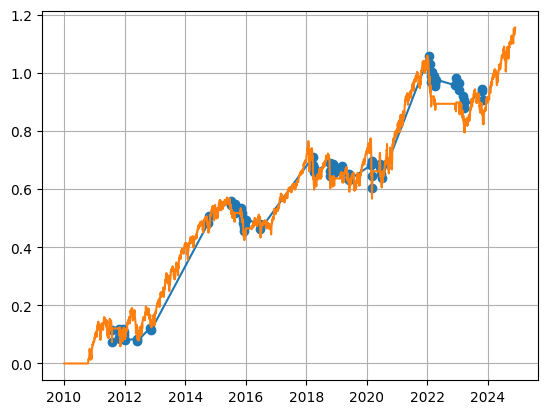

In [114]:
inpos = 0
pnls = []
dates = []
unrlzd = []
unrlzd_dt = []

for i, price in enumerate(spy.Close.SPY):
    ma = spy.Close.SPY.iloc[i-200:i].mean()
    ma_m1 = spy.Close.SPY.iloc[i-201:i-1].mean()
    unr = (price-spy.Close.SPY.iloc[i-1])/spy.Close.SPY.iloc[i-1] * inpos
    unrlzd.append(unr)
    unrlzd_dt.append(spy.index[i])

    if inpos == 0 and ma < price:
        inpos = 1
        entry = price
        #print('entry long',entry)

    elif inpos == 1 and ( ma > price):

        pnl = (price - entry)/entry * inpos
        inpos = 0
        #print('exit long', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

    if inpos == 0 and ma_m1 < spy.Close.SPY.iloc[i-1] and ma > price:
        inpos = -1
        entry = price
        #print('entry short',entry)

    elif inpos == -1 and ((price - entry)/entry * inpos >0.02 or ma < price):

        pnl = (price - entry)/entry * inpos
        inpos = 0
        #print('exit short', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

plt.plot(dates,np.cumsum(pnls), '-o')
plt.plot(unrlzd_dt , np.cumsum(unrlzd))
plt.grid()

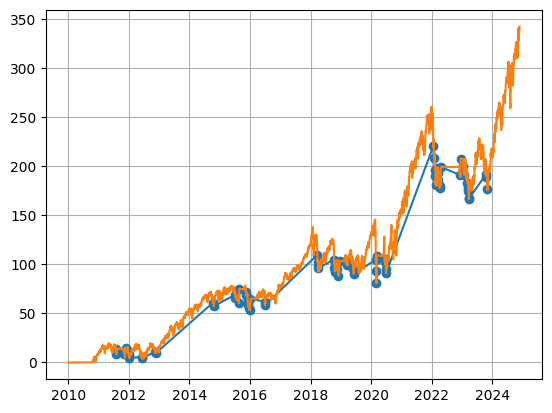

In [115]:
inpos = 0
pnls = []
dates = []
unrlzd = []
unrlzd_dt = []

for i, price in enumerate(spy.Close.SPY):
    ma = spy.Close.SPY.iloc[i-200:i].mean()
    ma_m1 = spy.Close.SPY.iloc[i-201:i-1].mean()
    unr = (price-spy.Close.SPY.iloc[i-1]) * inpos
    unrlzd.append(unr)
    unrlzd_dt.append(spy.index[i])

    if inpos == 0 and ma < price:
        inpos = 1
        entry = price
        #print('entry long',entry)

    elif inpos == 1 and ma > price:

        pnl = (price - entry) * inpos
        inpos = 0
        #print('exit long', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

    if inpos == 0 and ma_m1 < spy.Close.SPY.iloc[i-1] and ma > price:
        inpos = -1
        entry = price
        #print('entry short',entry)

    elif inpos == -1 and ((price - entry)/entry * inpos >0.04 or ma < price):

        pnl = (price - entry) * inpos
        inpos = 0
        #print('exit short', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

plt.plot(dates,np.cumsum(pnls), '-o')
plt.plot(unrlzd_dt , np.cumsum(unrlzd))
plt.grid()

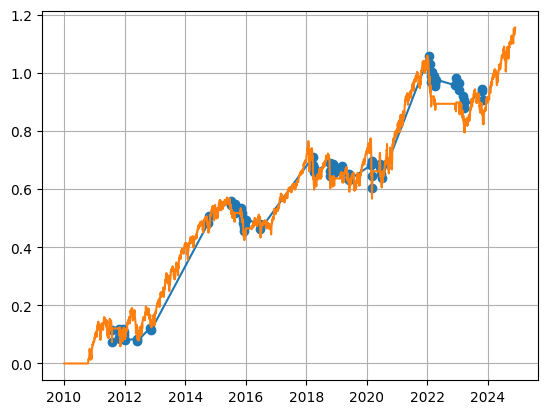

In [125]:
inpos = 0
pnls = []
dates = []
unrlzd = []
unrlzd_dt = []

for i, price in enumerate(spy.Close.SPY):
    ma = spy.Close.SPY.iloc[i-200:i].mean()
    ma_m1 = spy.Close.SPY.iloc[i-201:i-1].mean()
    unr = (price-spy.Close.SPY.iloc[i-1])/spy.Close.SPY.iloc[i-1] * inpos
    unrlzd.append(unr)
    unrlzd_dt.append(spy.index[i])

    if inpos == 0 and ma < price:
        inpos = 1
        entry = price
        #print('entry long',entry)

    elif inpos == 1 and ( ma > price):

        pnl = (price - entry)/entry * inpos
        inpos = 0
        #print('exit long', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

    if inpos == 0 and ma_m1 < spy.Close.SPY.iloc[i-1] and ma > price:
        inpos = -1
        entry = price
        #print('entry short',entry)

    elif inpos == -1 and ((price - entry)/entry * inpos >0.02 or ma < price):

        pnl = (price - entry)/entry * inpos
        inpos = 0
        #print('exit short', price, pnl*100)
        pnls.append(pnl)
        dates.append(spy.index[i])

plt.plot(dates,np.cumsum(pnls), '-o')
plt.plot(unrlzd_dt , np.cumsum(unrlzd))
plt.grid()

benchmark our strategy whith the buy and hold

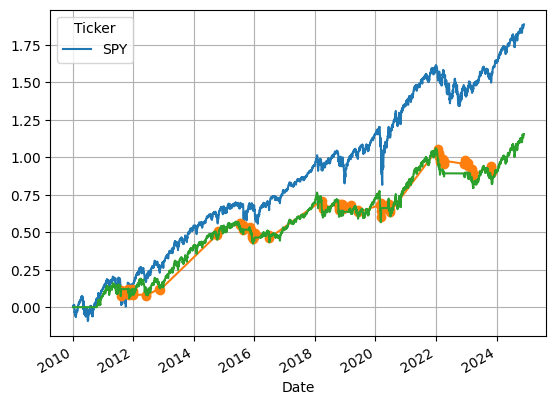

In [126]:
spy.Close.pct_change().cumsum().plot() #buy and hold
plt.plot(dates,np.cumsum(pnls), '-o')
plt.plot(unrlzd_dt , np.cumsum(unrlzd))
plt.grid()